In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [180]:
uber_df = pd.read_csv("Uber Request Data.csv")

In [181]:
# Returns first 10 rows
# It is useful for quickly testing if your object has the right type of data in it.
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [183]:
# View some basic statistical details like percentile, mean, std etc. 
# of a data frame or a series of numeric values.
uber_df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [184]:
# Make sure there are no duplicate request ids
sum(uber_df.duplicated(subset='Request id')) == 0

True

In [186]:
# Return a tuple representing the dimensionality of the DataFrame
uber_df.shape

(6745, 6)

In [187]:
# Checking of NA values in DataFrame
print(uber_df.isnull().sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [130]:
print(uber_df.isnull().values.any())
print(uber_df.isnull().values.sum())

True
6564


In [188]:
# checking % NAs column wise
print(uber_df.isnull().sum() * 100 / uber_df.shape[0])

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


In [189]:
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [190]:
# Convert Request Timestamp to Datetime Object
uber_df['Request timestamp'] = uber_df['Request timestamp'].astype(str)
uber_df['Request timestamp'] = uber_df['Request timestamp'].str.replace('/','-')
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'],dayfirst=True)

In [191]:
# Convert Drop Timestamp to Datetime Object
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].astype(str)
uber_df['Drop timestamp'] = uber_df['Drop timestamp'].str.replace('/','-')
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'],dayfirst=True)

In [192]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [193]:
# Extract hour from request timestamp
extract_hour = uber_df["Request timestamp"].dt.hour
extract_hour.head()
extract_hour.value_counts()
uber_df["request_hour"] = extract_hour

Text(0.5, 1.0, 'Supply Demand Gap from Airport to City')

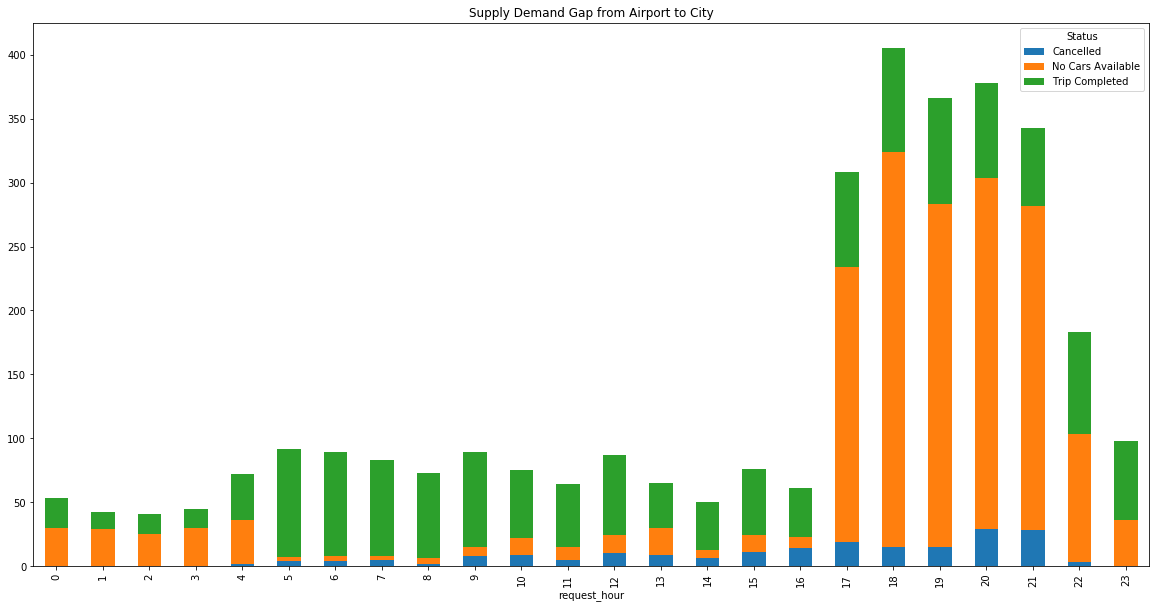

In [194]:
# Demand-Supply Gap from Airport to City
uber_df[(uber_df['Pickup point']=="Airport")].groupby(['request_hour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Supply Demand Gap from Airport to City')

Text(0.5, 1.0, 'Supply Demand Gap from City to Airport')

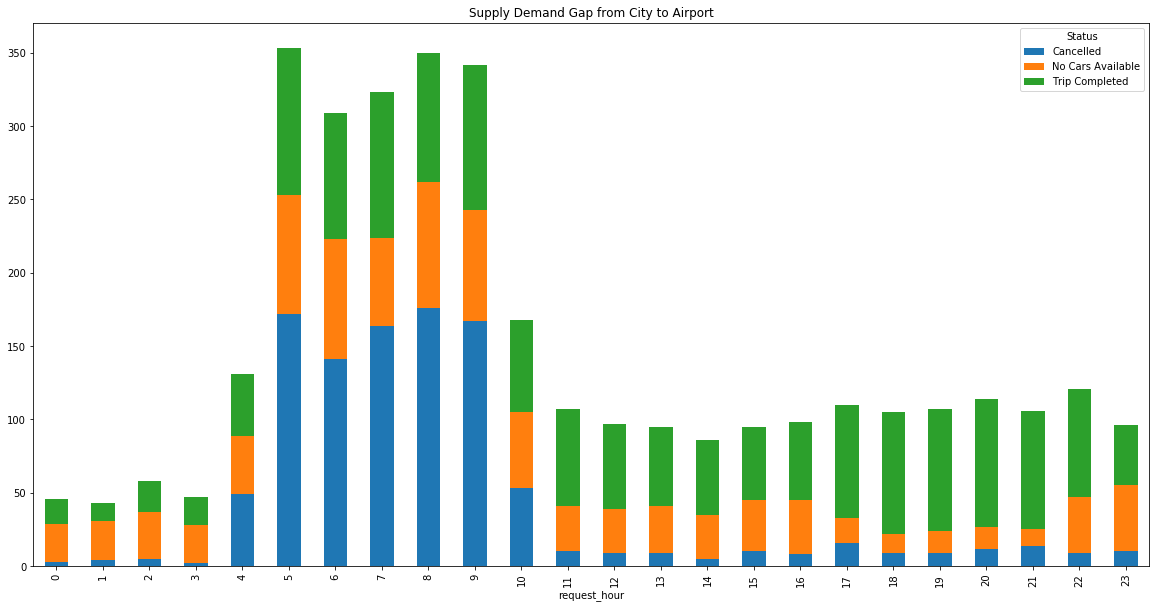

In [144]:
# Demand-Supply Gap from City to Airport
uber_df[(uber_df['Pickup point']=="City")].groupby(['request_hour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Supply Demand Gap from City to Airport')

Text(0.5, 1.0, 'Frequency of Requests by Hour')

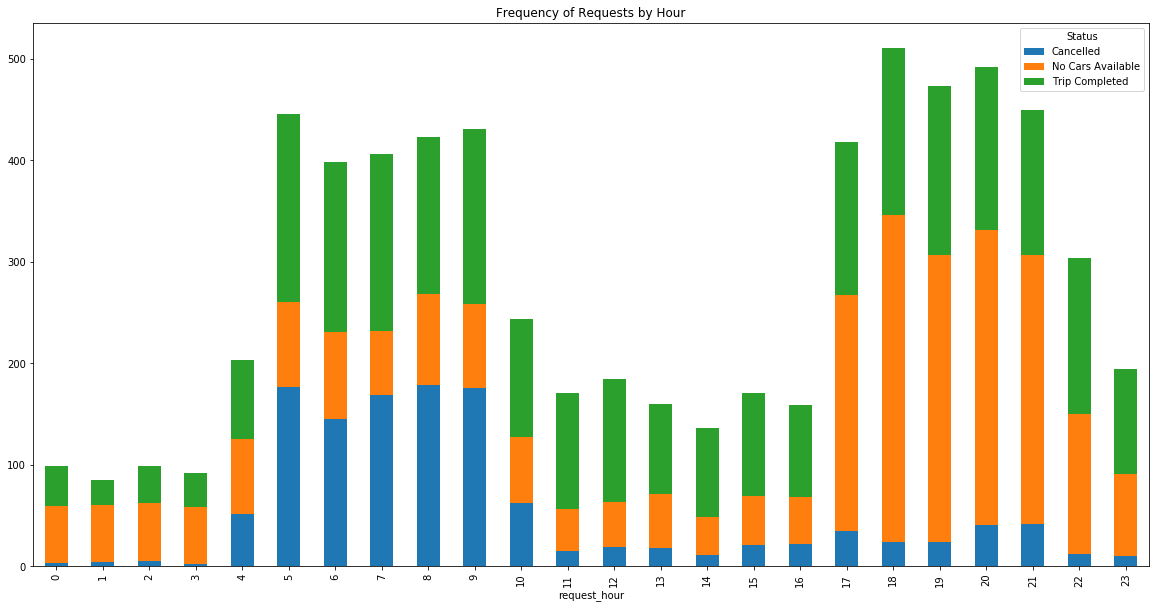

In [145]:
# Frequency of Requests by Hour
uber_df.groupby(['request_hour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Frequency of Requests by Hour')

In [195]:
# creating a time slot for various time period of 
def analyseTimePeriod(x):
    'divide day time into 4 categories'
    if x<5:
        return "Pre Morning"
    elif 5 >= x < 10:
        return "Morning Rush"
    elif 10 >= x < 17:
        return "Day Time"
    elif 17 >= x < 22:
        return "Evening Rush"
    else:
        return "Late Night"
    
uber_df["time_slot"] = uber_df.request_hour.apply(lambda x: analyseTimePeriod(x))

In [196]:
uber_df.time_slot.value_counts()

Late Night      2422
Day Time        1901
Evening Rush    1399
Pre Morning      578
Morning Rush     445
Name: time_slot, dtype: int64

Text(0.5, 1.0, 'Frequency of Requests by Timeslot')

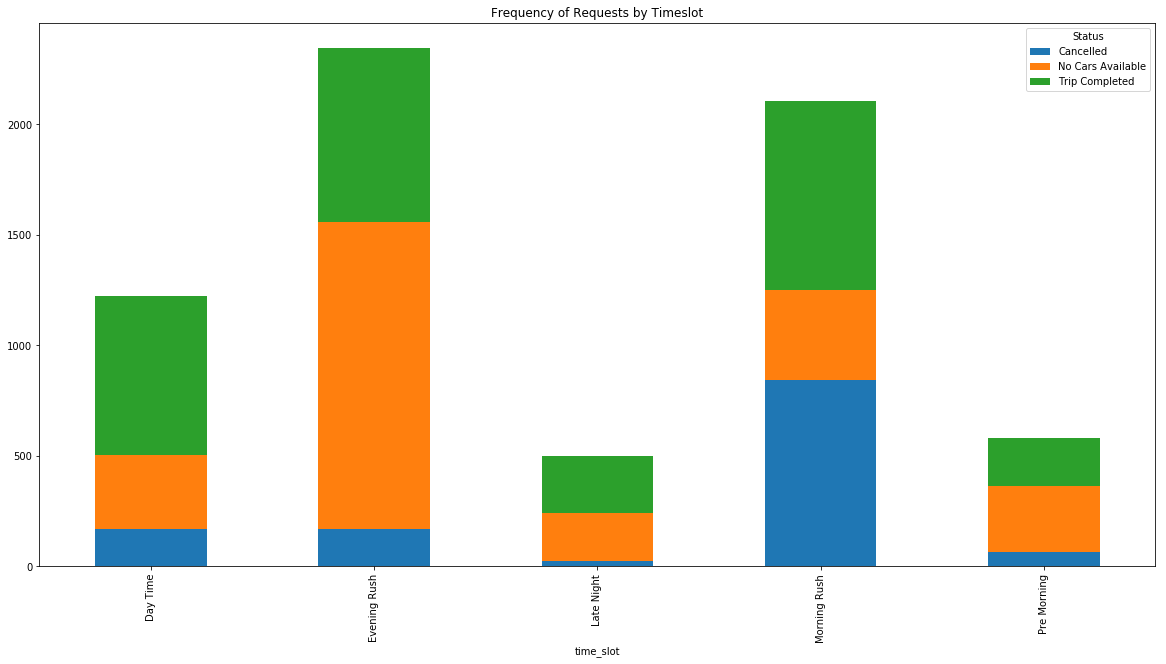

In [148]:
# Frequency of Requests by Hour
uber_df.groupby(['time_slot','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Frequency of Requests by Timeslot')

In [197]:
# Function to create pie charts instead of a count plots
def drawPieChart(df_param):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = df_param.index.values
    sizes = df_param['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

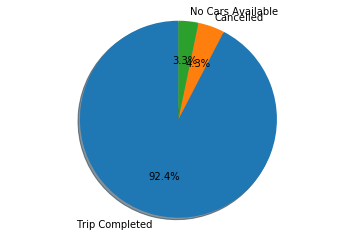

In [198]:
# % of Supply demand gap from the Airport to City in the morning timeslot
uber_df_airport = uber_df.loc[(uber_df["Pickup point"] == "Airport") & (uber_df.time_slot == "Morning Rush")] 
uber_df_airport_morning_count = pd.DataFrame(uber_df_airport.Status.value_counts())
drawPieChart(uber_df_airport_morning_count)

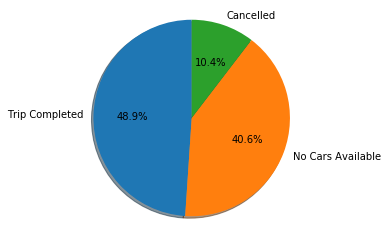

In [178]:
# % of Supply demand gap from the Airport to City in the evening timeslot
uber_df_airport = uber_df.loc[(uber_df["Pickup point"] == "Airport") & (uber_df.time_slot == "Evening Rush")] 
uber_df_airport_evening_count = pd.DataFrame(uber_df_airport.Status.value_counts())
drawPieChart(uber_df_airport_evening_count)

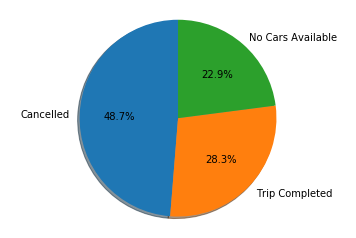

In [176]:
# % of Supply demand gap from the City to Airport in the morning timeslot
uber_df_city = uber_df.loc[(uber_df["Pickup point"] == "City") & (uber_df.time_slot == "Morning Rush")]
uber_df_city_morning_count = pd.DataFrame(uber_df_city.Status.value_counts())
drawPieChart(uber_df_city_morning_count)

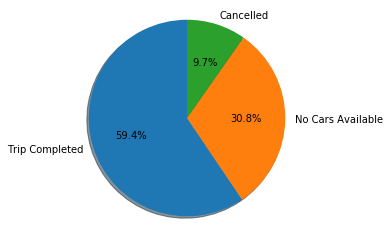

In [200]:
# % of Supply demand gap from the City to Airport in the evening timeslot
uber_df_city = uber_df.loc[(uber_df["Pickup point"] == "City") & (uber_df.time_slot == "Evening Rush")]
uber_df_city_morning_count = pd.DataFrame(uber_df_city.Status.value_counts())
drawPieChart(uber_df_city_morning_count)